# Importing the required Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [ ]:
df = pd.read_csv("shopping_trends_updated.csv")

In [6]:
# Set seaborn style
sns.set(style="whitegrid")

<Axes: >

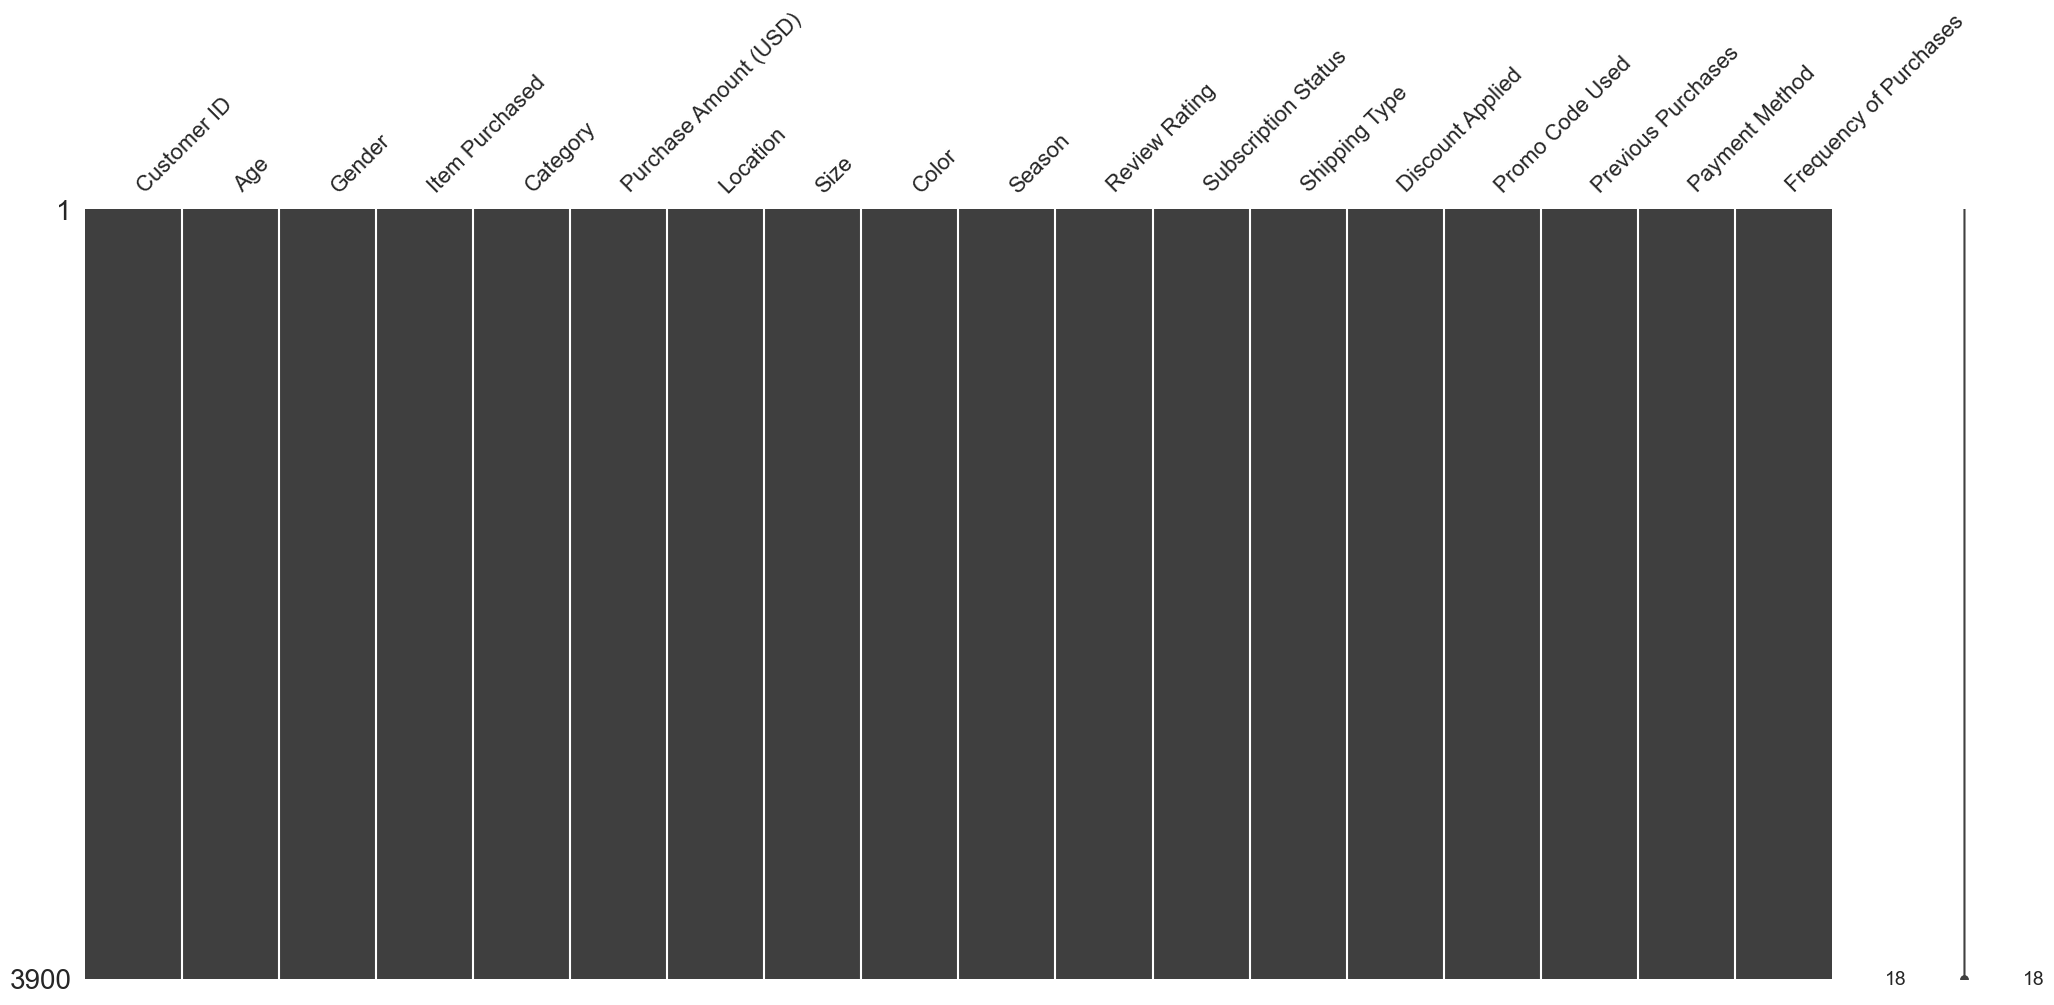

In [7]:
import missingno as msn
msn.matrix(df)

In [8]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [11]:
df.keys()

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [12]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
# 1. Distribution of customer ages
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

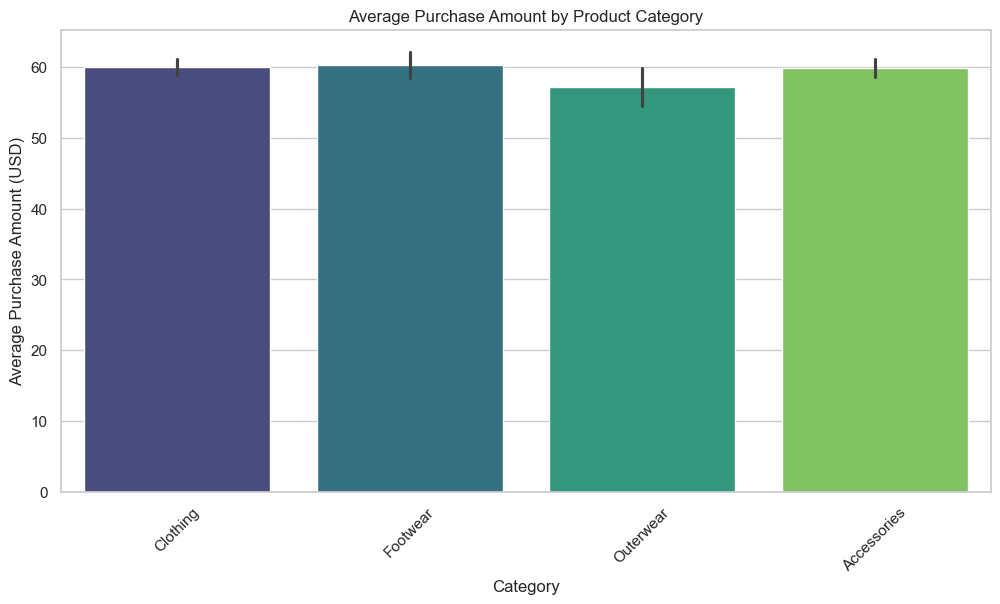

In [17]:
import warnings
warnings.simplefilter("ignore")
# 2. Average purchase amount per product category
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Category'], y=df['Purchase Amount (USD)'], estimator=lambda x: x.mean(), palette='viridis')
plt.title('Average Purchase Amount by Product Category')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()


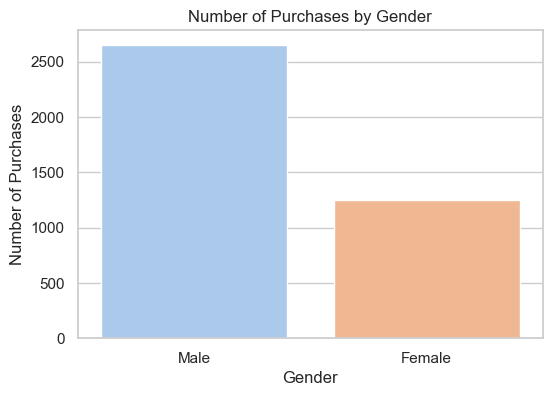

In [15]:
# 3. Gender with highest number of purchases
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('Number of Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.show()

Most Commonly Purchased Items per Category:
 Category
Accessories    Jewelry
Clothing        Blouse
Footwear       Sandals
Outerwear       Jacket
Name: Item Purchased, dtype: object


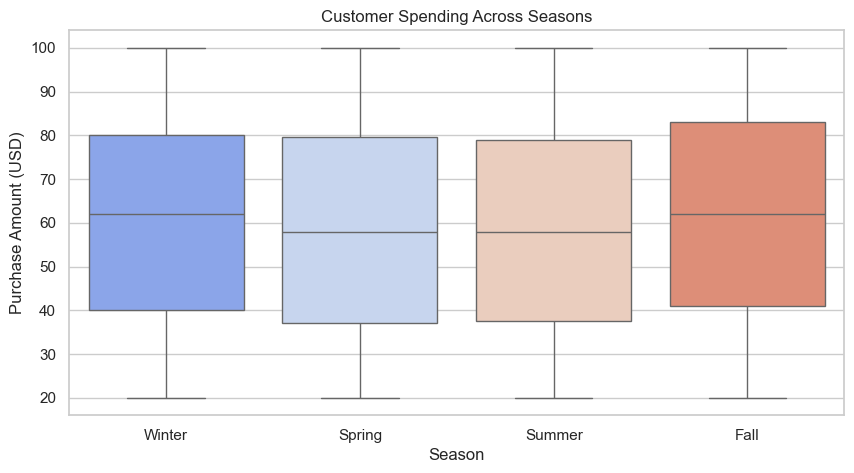

In [18]:
# 4. Most commonly purchased items per category
most_purchased = df.groupby('Category')['Item Purchased'].agg(lambda x: x.mode()[0])
print("Most Commonly Purchased Items per Category:\n", most_purchased)

# 5. Seasonal spending trend
plt.figure(figsize=(10, 5))
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=df, palette='coolwarm')
plt.title('Customer Spending Across Seasons')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.show()

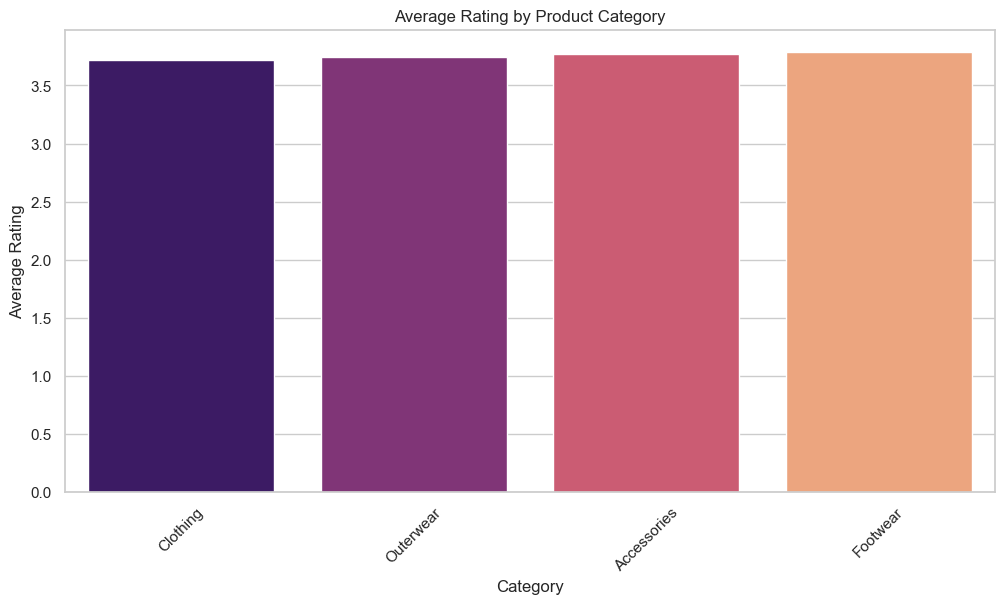

In [19]:
# 6. Average rating per product category
avg_rating = df.groupby('Category')['Review Rating'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='magma')
plt.title('Average Rating by Product Category')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()

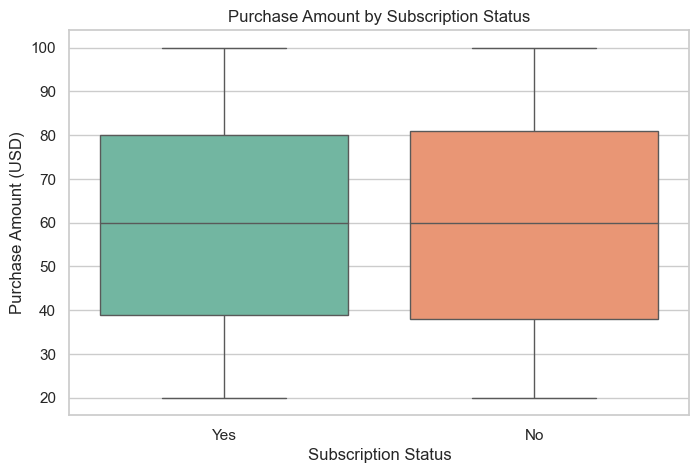

In [20]:
# 7. Purchase behavior by subscription status
plt.figure(figsize=(8, 5))
sns.boxplot(x='Subscription Status', y='Purchase Amount (USD)', data=df, palette='Set2')
plt.title('Purchase Amount by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Purchase Amount (USD)')
plt.show()

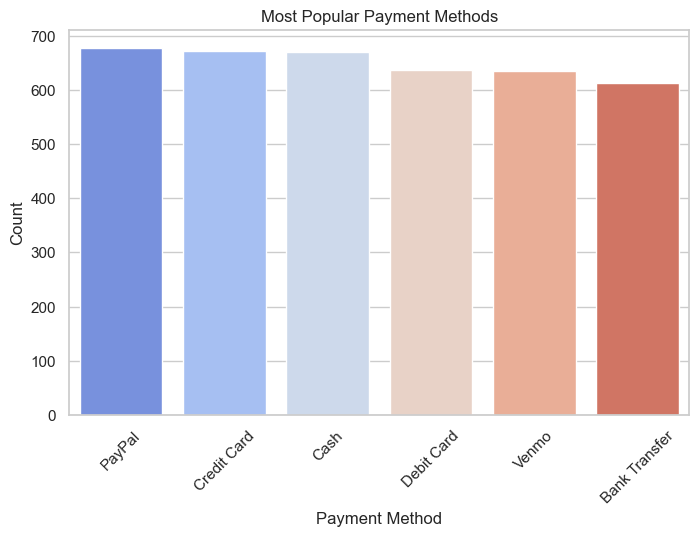

In [21]:
# 8. Most popular payment method
payment_counts = df['Payment Method'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='coolwarm')
plt.title('Most Popular Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

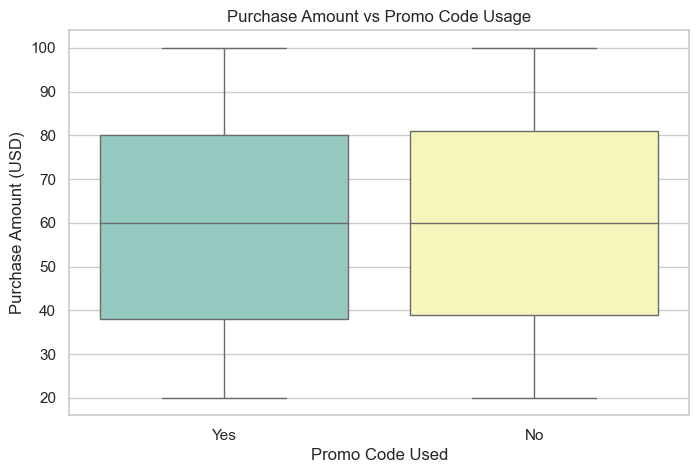

In [22]:
# 9. Spending behavior with promo codes
plt.figure(figsize=(8, 5))
sns.boxplot(x='Promo Code Used', y='Purchase Amount (USD)', data=df, palette='Set3')
plt.title('Purchase Amount vs Promo Code Usage')
plt.xlabel('Promo Code Used')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# More analyses will follow including correlations, shipping preferences, color trends, etc.


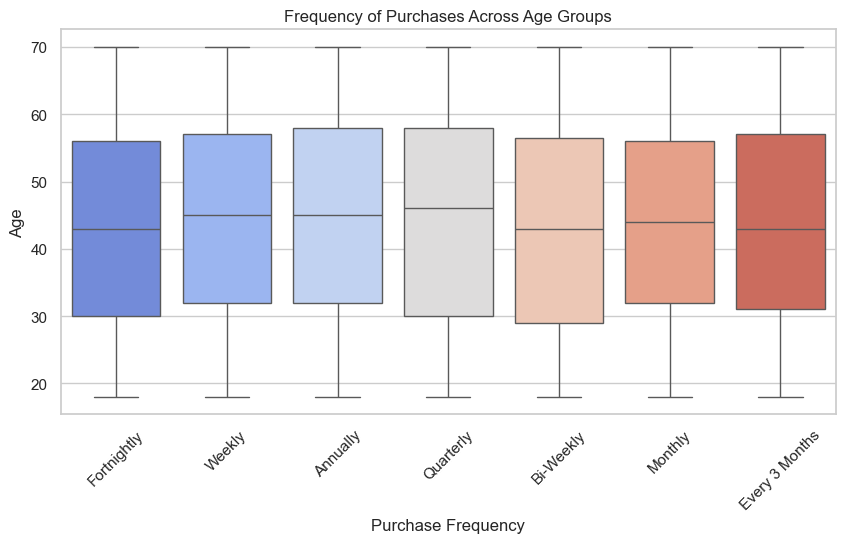

In [23]:
# 10. Frequency of purchases across age groups
plt.figure(figsize=(10, 5))
sns.boxplot(x='Frequency of Purchases', y='Age', data=df, palette='coolwarm')
plt.title('Frequency of Purchases Across Age Groups')
plt.xlabel('Purchase Frequency')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

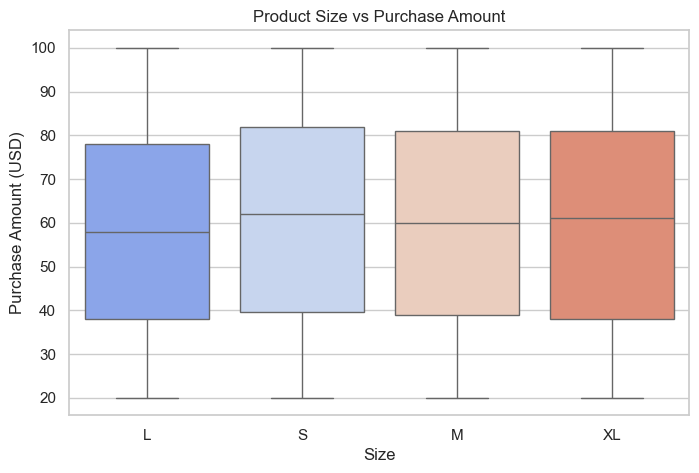

In [24]:
# 11. Correlation between product size and purchase amount
plt.figure(figsize=(8, 5))
sns.boxplot(x='Size', y='Purchase Amount (USD)', data=df, palette='coolwarm')
plt.title('Product Size vs Purchase Amount')
plt.xlabel('Size')
plt.ylabel('Purchase Amount (USD)')
plt.show()

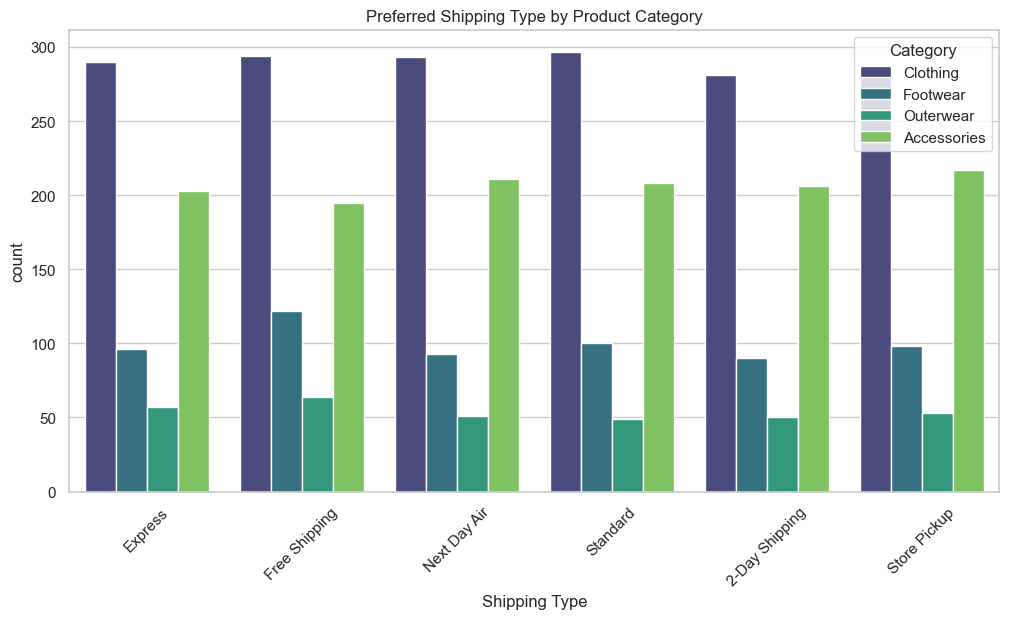

In [25]:
# 12. Preferred shipping type per category
plt.figure(figsize=(12, 6))
sns.countplot(x='Shipping Type', hue='Category', data=df, palette='viridis')
plt.title('Preferred Shipping Type by Product Category')
plt.xticks(rotation=45)
plt.show()

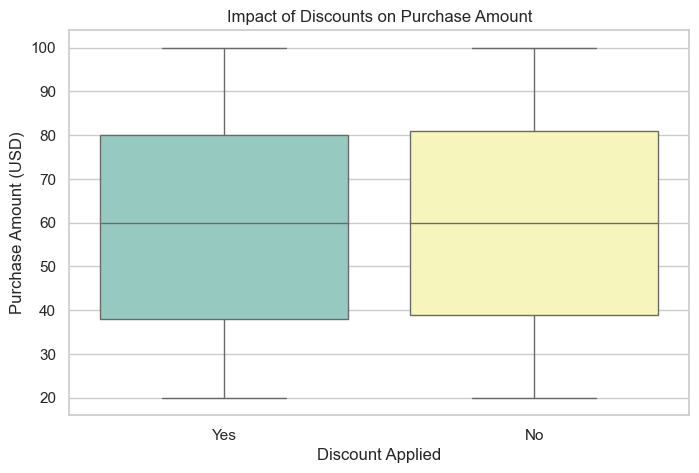

In [26]:
# 13. Impact of discounts on purchase decisions
plt.figure(figsize=(8, 5))
sns.boxplot(x='Discount Applied', y='Purchase Amount (USD)', data=df, palette='Set3')
plt.title('Impact of Discounts on Purchase Amount')
plt.xlabel('Discount Applied')
plt.ylabel('Purchase Amount (USD)')
plt.show()

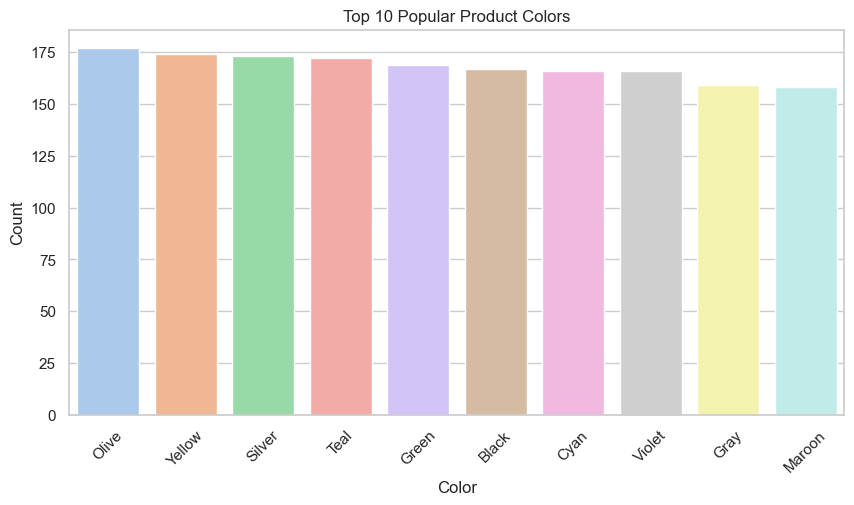

In [27]:
# 14. Popular product colors
color_counts = df['Color'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=color_counts.index[:10], y=color_counts.values[:10], palette='pastel')
plt.title('Top 10 Popular Product Colors')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [28]:
# 15. Average number of previous purchases
avg_previous_purchases = df['Previous Purchases'].mean()
print(f'Average Number of Previous Purchases: {avg_previous_purchases:.2f}')

Average Number of Previous Purchases: 25.35


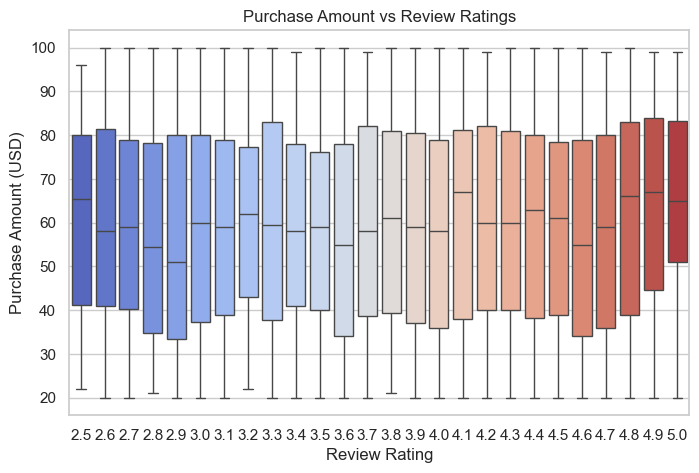

In [29]:
# 16. Purchase amount vs review ratings
plt.figure(figsize=(8, 5))
sns.boxplot(x='Review Rating', y='Purchase Amount (USD)', data=df, palette='coolwarm')
plt.title('Purchase Amount vs Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Purchase Amount (USD)')
plt.show()

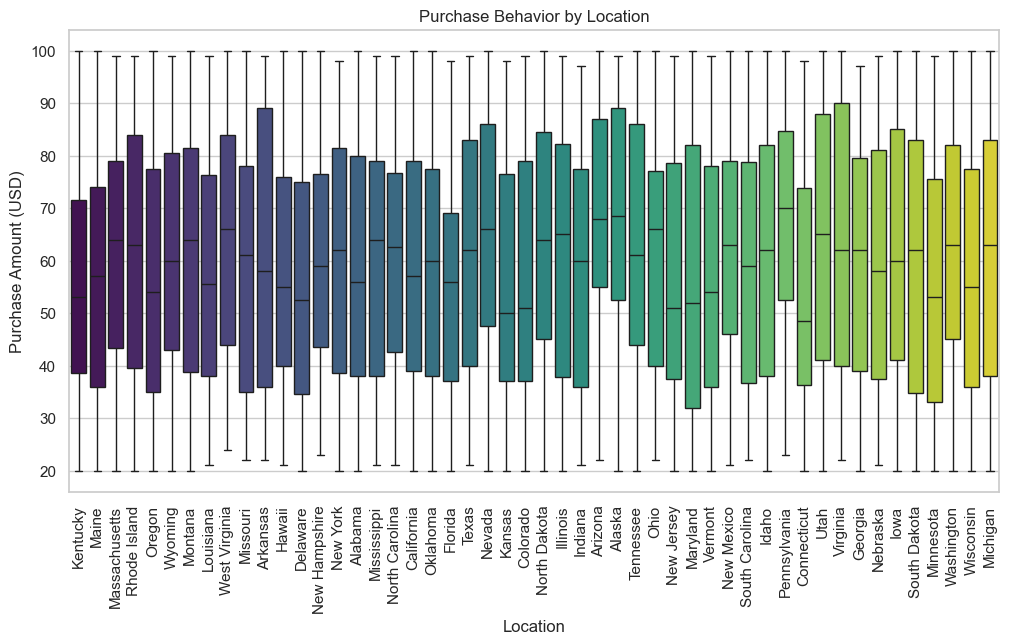

In [30]:
# 17. Purchase behavior across locations
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Purchase Amount (USD)', data=df, palette='viridis')
plt.title('Purchase Behavior by Location')
plt.xticks(rotation=90)
plt.show()

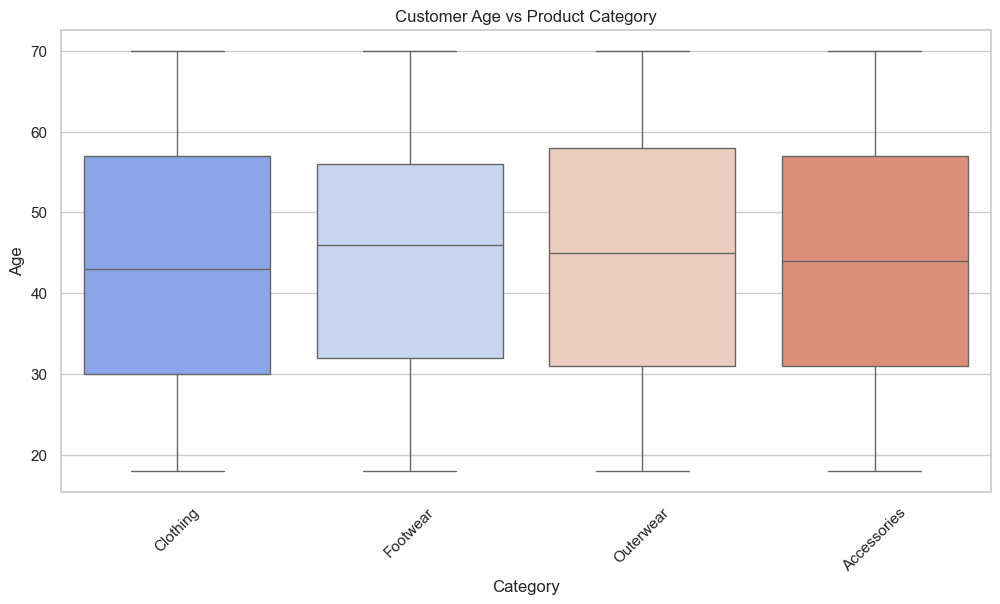

In [31]:
# 18. Relationship between customer age and product category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Age', data=df, palette='coolwarm')
plt.title('Customer Age vs Product Category')
plt.xticks(rotation=45)
plt.show()

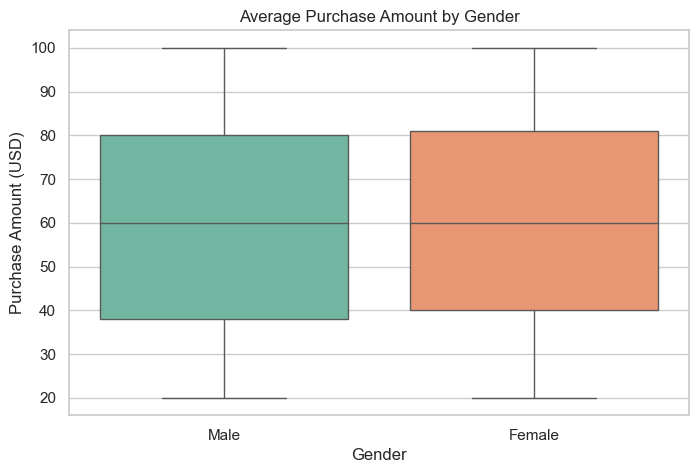

In [32]:
# 19. Purchase amount by gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette='Set2')
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()